<h1><center>TWO WHEELER LOAN APPLICATION CLASSIFICATION</center></h1>

<center><img src='https://www.fibe.in/_next/image/?url=https%3A%2F%2Faltcont.fibe.in%2Fwp-content%2Fuploads%2F2020%2F06%2Frendered.png&w=1920&q=75'></center>

# Import Library

<center><text = **TWO WHEELER LOAN APPLICATION CLASSIFICATION**></center>

In [ ]:
pip install lazypredict

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix

from xgboost import XGBClassifier

from lazypredict.Supervised import LazyClassifier

# data loading

In [ ]:
train_df = pd.read_csv('/content/Assignment_Train.csv')
train_df.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.00,0.00,1.00,NaN,NaN,0.00,5324.00,67.22,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.00,0.00,0.00,NaN,NaN,0.00,1998.00,100.00,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.00,0.00,0.00,NaN,NaN,0.00,-1.00,-1.00,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.00,0.00,1.00,NaN,NaN,0.00,1998.00,72.78,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.00,0.00,1.00,NaN,NaN,0.00,1998.00,68.10,High,DECLINED


In [ ]:
test_df = pd.read_csv("/content/Assignment_Test.csv")
test_df.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.00,0.00,0.00,0.00,NaN,0.00,676,100.00,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.00,0.00,NaN,0.00,NaN,0.00,897,-1.00,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.00,1.00,0.00,1.00,NaN,0.00,839,100.00,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.00,0.00,0.00,NaN,NaN,0.00,2050,-1.00,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.00,0.00,0.00,NaN,NaN,0.00,-1,-1.00,Very Low


# Data Preprossing

In [ ]:
train_df.shape

(10000, 55)

In [ ]:
test_df.shape

(2000, 55)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [ ]:
train_df.describe()

,DEALER ID,mobile,TOTAL ASSET COST,ASSET MODEL NO,APPLIED AMOUNT,DOB,AGE,Phone Social Premium.a23games,Phone Social Premium.amazon,Phone Social Premium.byjus,...,Phone Social Premium.paytm,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore
count,10000.00,10000.00,4892.00,10000.00,10000.00,10000.00,10000.00,1.00,8084.00,8052.00,...,8243.00,1.00,8221.00,8215.00,8057.00,1573.00,9.00,8218.00,9996.00,9996.00
mean,102936.46,8630041287.65,97612.52,150660.76,91796.73,9813395.70,31.80,0.00,0.49,0.15,...,0.82,0.00,0.02,0.15,0.25,0.85,0.00,0.00,1652.94,55.65
std,37830.98,1077717283.43,16745.03,20848.00,27000.18,8930653.79,11.20,NaN,0.50,0.36,...,0.38,NaN,0.13,0.35,0.43,0.35,0.00,0.02,984.11,42.10
min,49849.00,6000042231.00,51873.00,124587.00,10400.00,1011943.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00
25%,79953.75,7894857645.25,88425.50,139542.00,80000.00,1012000.00,25.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,809.00,-1.00
50%,94631.00,8867376591.00,94400.00,143238.00,90000.00,7112001.00,31.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1988.00,73.57
75%,108463.00,9588181026.75,103499.25,160216.00,99000.00,16051967.00,39.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2031.00,96.00
max,202616.00,9999977149.00,241116.00,201897.00,1420000.00,31122001.00,79.00,0.00,1.00,1.00,...,1.00,0.00,1.00,1.00,1.00,1.00,0.00,1.00,6311.00,100.00


1. Phone Social Premium.amazon: 48.65% of users subscribed.
2. Phone Social Premium.byjus: 14.96% subscribed.
3. Phone Social Premium.flipkart: 74.84% subscribed.
4. Phone Social Premium.indiamart: 98.69% subscribed, almost everyone.
5. Some columns (e.g., Phone Social Premium.amazon, Phone Social Premium.byjus) have less than the full 10,000 rows, indicating missing values.
   For instance:
   Phone Social Premium.amazon: 8,084 entries.
   Phone Social Premium.flipkart: 8,168 entries.
   Handling missing values could be necessary for further analysis.

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     1828 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   MIDDLE NAME                          595 non-null    object 
 7   LAST NAME                            1869 non-null   object 
 8   mobile                               2000 non-null   int64  
 9   AADHAR VERIFIED                      2000 non-null   object 
 10  Cibil Score                          1158 non-null   object 
 11  MOBILE VERIFICATION           

In [ ]:
impactless_cols = ['DEALER ID', 'AADHAR VERIFIED' ,'MOBILE VERIFICATION', 'APPLICATION LOGIN DATE','HDB BRANCH NAME','HDB BRANCH STATE','FIRST NAME','MIDDLE NAME','LAST NAME','mobile','Personal Email Address','DOB','EMPLOYER NAME','Pan Name','name','vpa','upi_name']

1. **[DEALER ID, 'APPLICATION LOGIN DATE','HDB BRANCH NAME','HDB BRANCH STATE','FIRST NAME','MIDDLE NAME','LAST NAME','mobile','Personal Email Address','DOB','EMPLOYER NAME']**

    These are likely an identifier specific, which doesn't provide meaningful information for prediction as it's a categorical identifier.
    
2. **['AADHAR VERIFIED' ,'MOBILE VERIFICATION']**

    As all the values of thses columns in training data are true it is even impactless in prediction.

In [ ]:
train_df.drop(impactless_cols, axis=1, inplace=True)
test_df.drop(impactless_cols, axis=1, inplace=True)

In [ ]:
train_df.isnull().sum()

Cibil Score                            4297
DEALER NAME                               4
TOTAL ASSET COST                       5108
ASSET CTG                              5108
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
MARITAL STATUS                         4894
GENDER                                    0
AGE                                       0
ADDRESS TYPE                           3312
EMPLOY CONSTITUTION                    4998
EMPLOYER TYPE                          4998
Phone Social Premium.a23games          9999
Phone Social Premium.amazon            1916
Phone Social Premium.byjus             1948
Phone Social Premium.flipkart          1832
Phone Social Premium.housing           1776
Phone Social Premium.indiamart         1775
Phone Social Premium.instagram         6630
Phone Social Premium.isWABusiness      8427
Phone Social Premium.jeevansaath

In [ ]:
# droping the columns which are having more than 60% null values
null_per = train_df.isnull().sum() / train_df.shape[0]

null_percent_more = null_per[null_per > 0.6].index

train_df.drop(null_percent_more, axis=1, inplace=True)

train_df.head()

,Cibil Score,DEALER NAME,TOTAL ASSET COST,ASSET CTG,ASSET MODEL NO,APPLIED AMOUNT,PRIMARY ASSET MAKE,Primary Asset Model No,MARITAL STATUS,GENDER,...,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,726,V D AUTO WHEELS CHHOTIAL,95041.00,MCEXA,139542,85000,HONDA MOTORS,SHINE DRUM BSVI,Married,Male,...,0.00,1.00,0.00,0.00,1.00,0.00,5324.00,67.22,High,APPROVED
1,NaN,CHANDAN AUTOMOBILES 259 KGS TOWER,NaN,NaN,140208,90000,HERO MOTORS,SPLENDOR PLUS SELF DRUM BSVI I3S,NaN,Male,...,0.00,1.00,0.00,0.00,0.00,0.00,1998.00,100.00,High,APPROVED
2,737,KN VISION 53HILL CART ROAD,119436.00,SCEXA,160001,75000,TVS MOTOR CO,TVS NTORQ SUPER SQUAD EDITION BSVI,Single,Male,...,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,Low,APPROVED
3,713,MAHADEV AUTOMOBILES MANGLAUR,87000.00,MCECA,160832,78500,HERO MOTORS,SPLENDOR+ BLK ACCT SS DRUM I3S BSVI,Single,Male,...,0.00,1.00,0.00,0.00,1.00,0.00,1998.00,72.78,High,APPROVED
4,669,DWARKESH AUTO SHAMLAJI ROAD,NaN,NaN,174641,70000,HONDA MOTORS,DIO STD BSVI,NaN,Male,...,0.00,1.00,0.00,0.00,1.00,0.00,1998.00,68.10,High,DECLINED


1.  The dataset has 30 columns now, reduced after dropping columns with excessive missing values.

2.  The remaining columns include key variables such as Cibil Score, TOTAL ASSET COST, ASSET MODEL NO, and various Phone Social Premium services, along with demographic and product-related features like PRIMARY ASSET MAKE, MARITAL STATUS, and GENDER which creates impact in predicting target variable.

In [ ]:
# droping the columns which are having more than 60% null values
null_per = test_df.isnull().sum() / test_df.shape[0]

null_percent_more = null_per[null_per > 0.6].index

test_df.drop(null_percent_more, axis=1, inplace=True)

In [ ]:
# imputing the null values
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)].tolist()
    return outliers

def impute_data(data):
    # Impute numerical columns
    for column in data.columns:
        if (data[column].dtype == object) or (data[column].dtype == bool) or (data[column].dtype == np.float64):
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            outliers = find_outliers(data, column)
            if outliers:
                # Replace outliers with the median
                data.loc[data[column].isin(outliers), column] = data[column].median()
            else:
              # Replace missing values with the mean
              data[column].fillna(data[column].mean(), inplace=True)

    return data

# Example usage
train_df_pro = train_df.copy()
train_df_pro = impute_data(train_df_pro)

test_df_pro = test_df.copy()
test_df_pro = impute_data(test_df_pro)

1. We are checking if there are outliers in the numerical columns of the train data.
2. The missing values in numerical columns which contain outliers are being imputed with median.
3. The missing values in numerical columns without outliers are being imputed with mean.
4. The missing values in categorical columns are being imputed with mode.

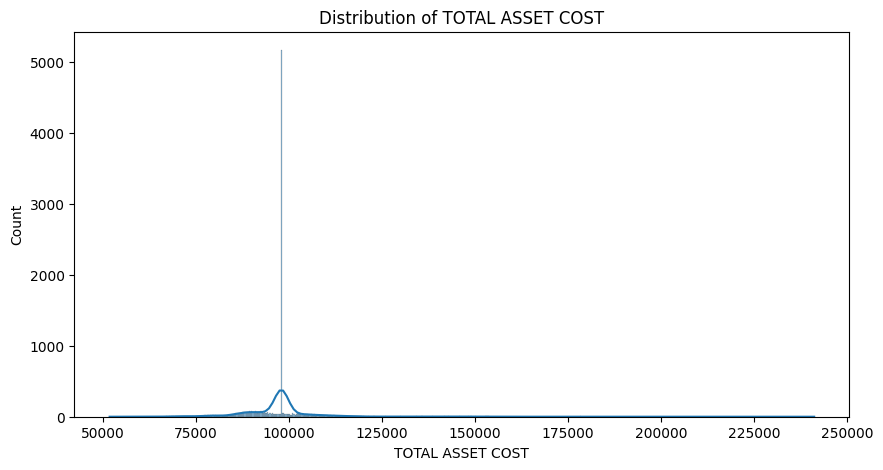

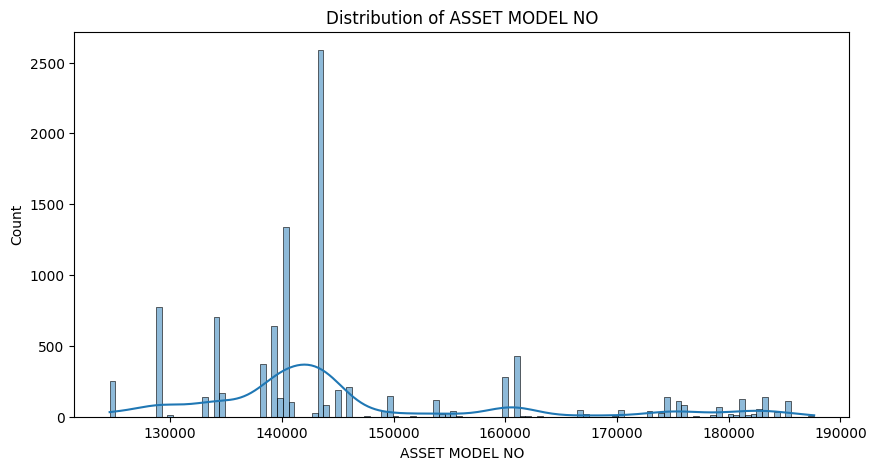

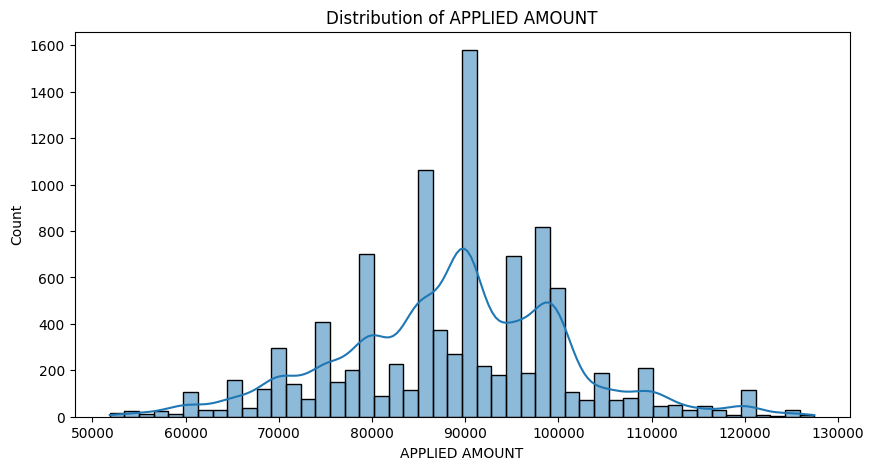

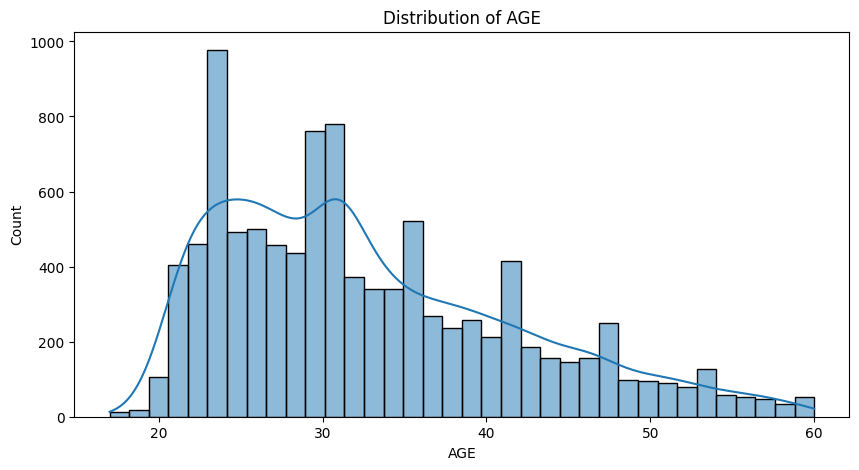

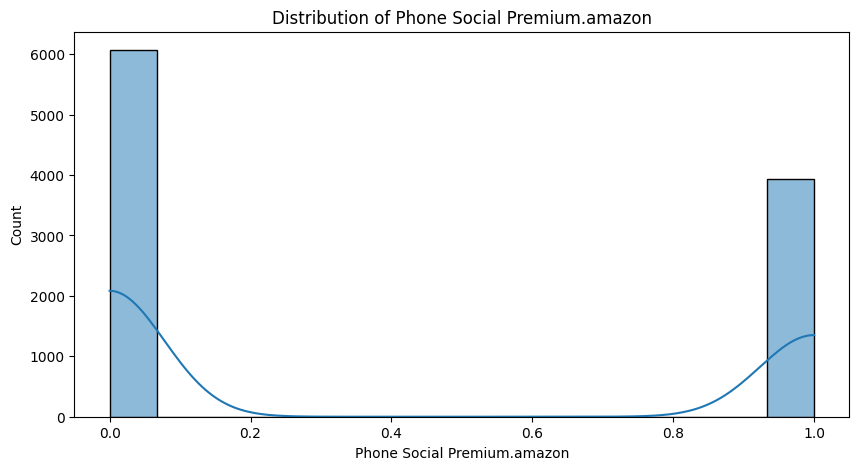

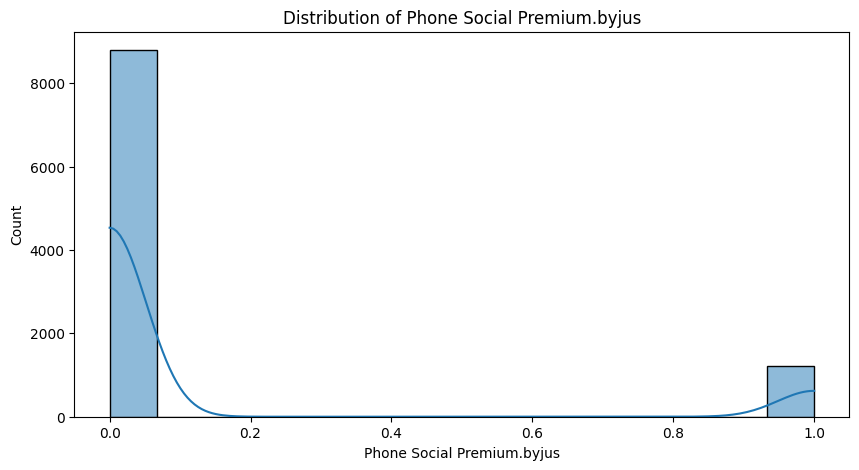

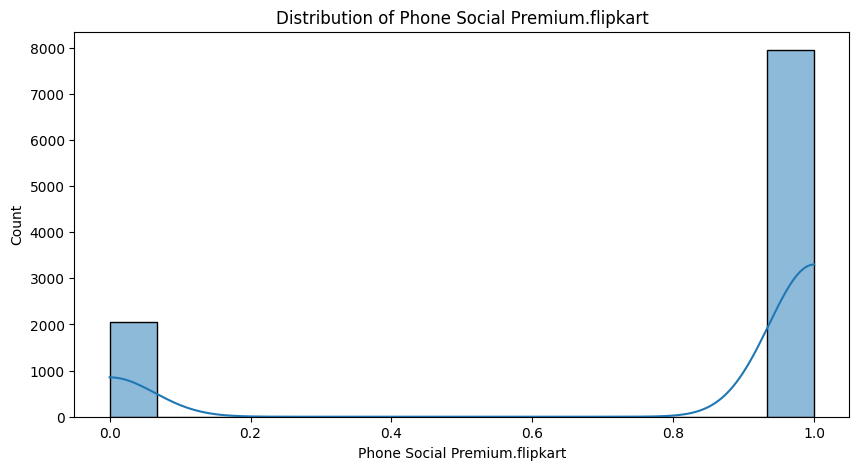

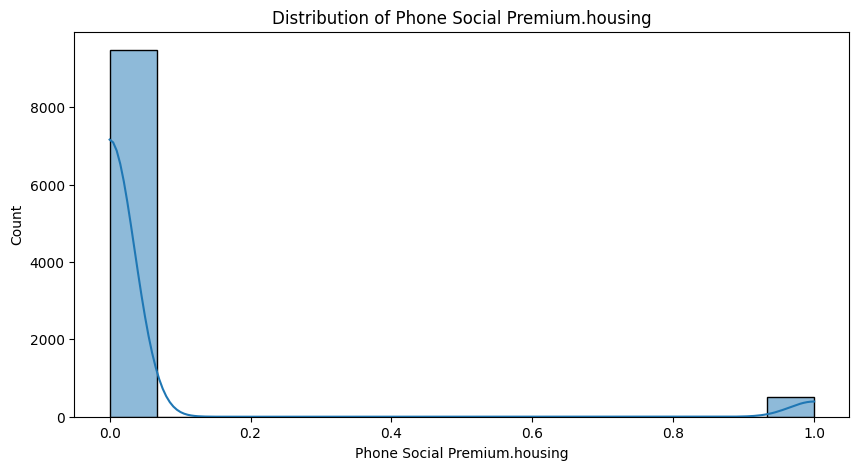

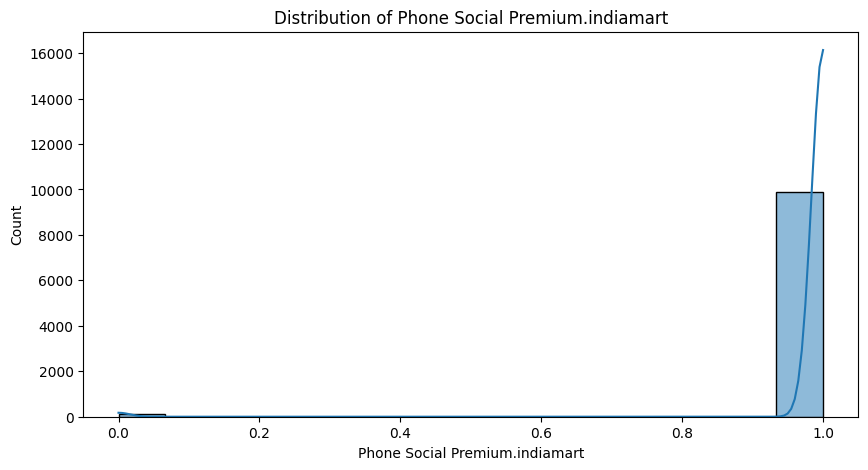

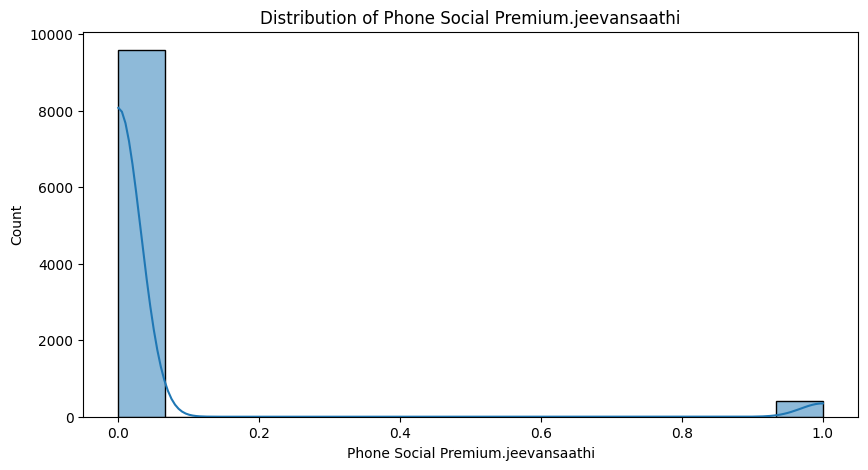

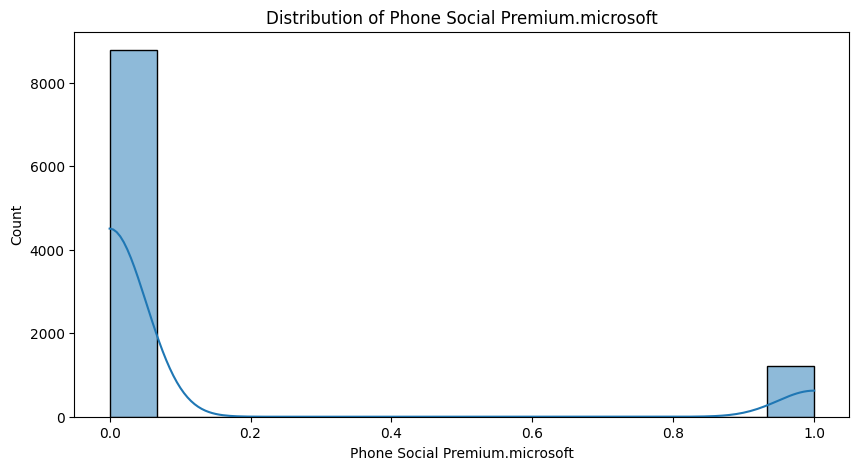

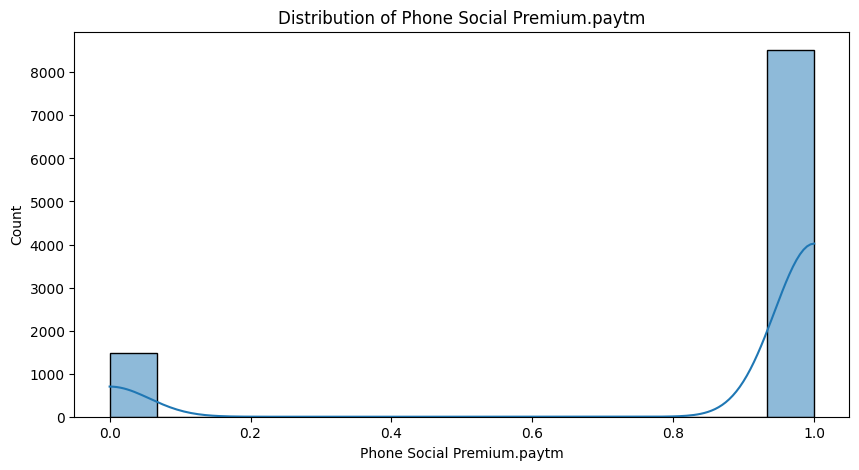

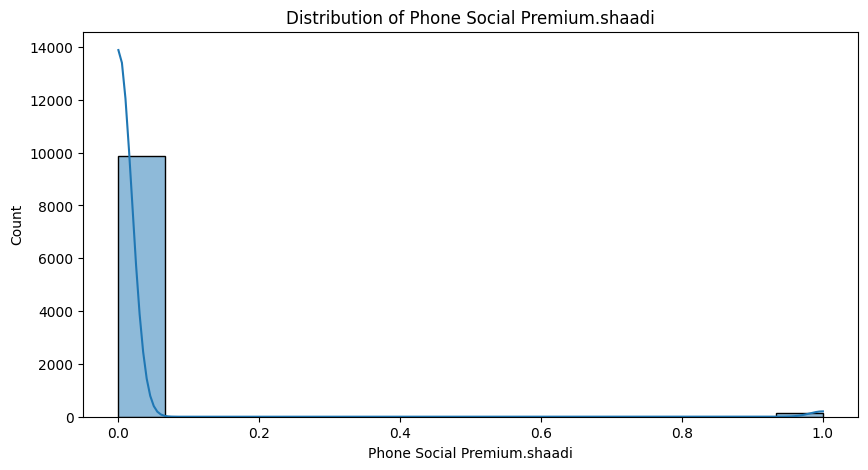

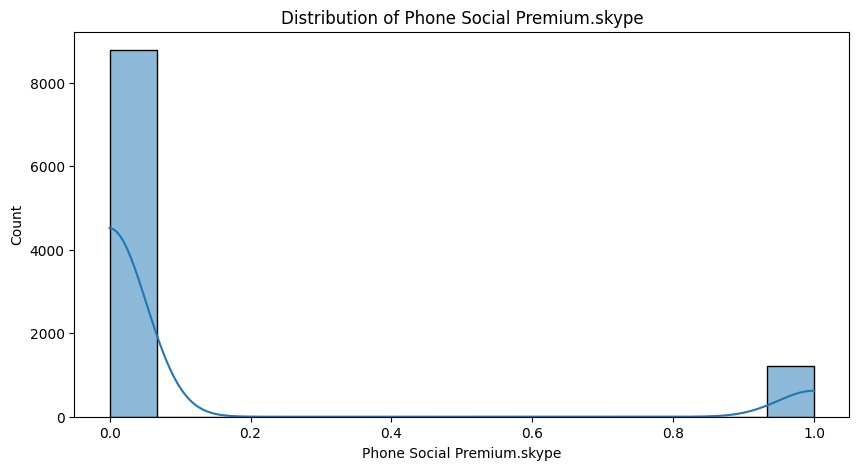

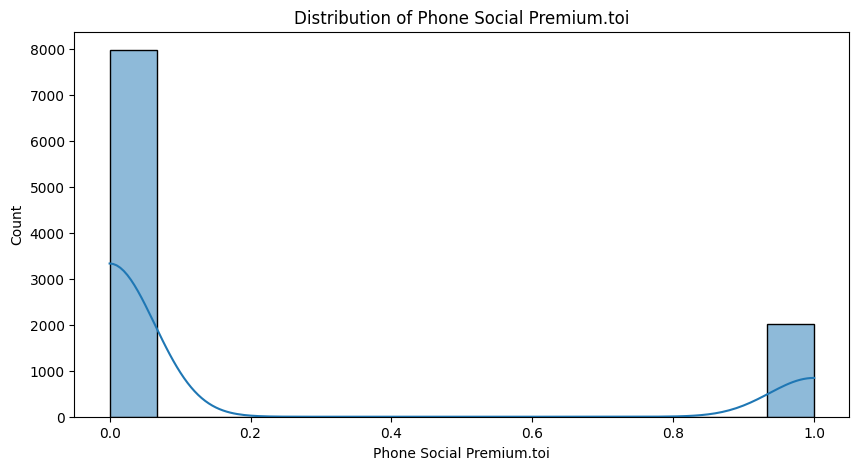

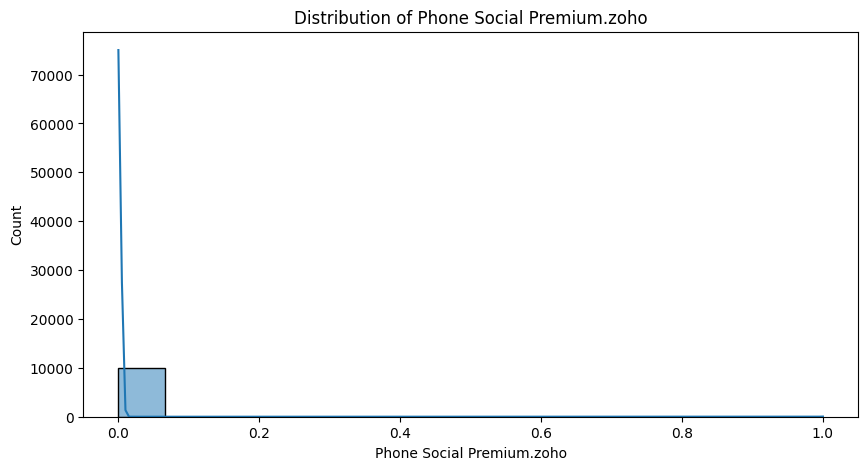

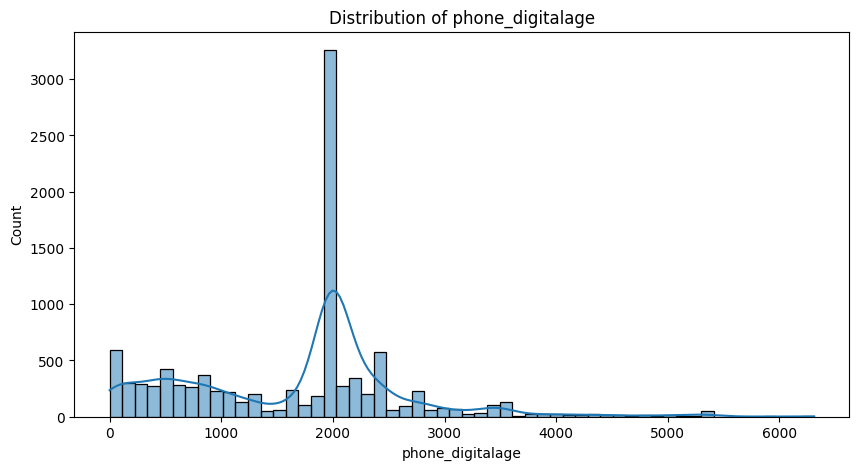

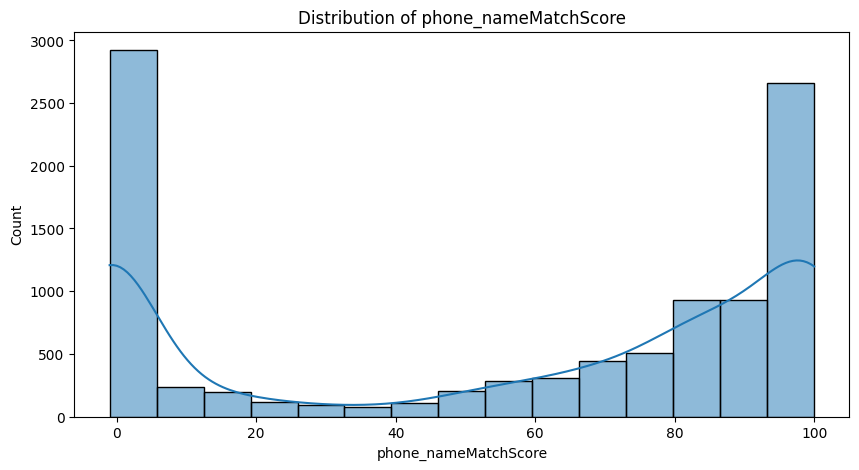

In [ ]:
# Visualize distributions
for column in train_df_pro.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(train_df_pro[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

* The TOTAL ASSET COST and APPLIED AMOUNT both have sharp peaks, which may indicate pricing patterns or loan application thresholds that need further analysis.
* The ASSET MODEL NO distribution suggests certain models are significantly more popular, indicating possible groupings or stratifications in your dataset.
* Right-Skewed Distributions: All distributions are skewed to the right, indicating that there are outliers with higher values.
* Distinct Modes: Each distribution has a clear mode, suggesting that certain values are more common than others.
* Correlation: It would be interesting to investigate the correlations between these variables to understand how asset cost, model number, and applied amount are related.

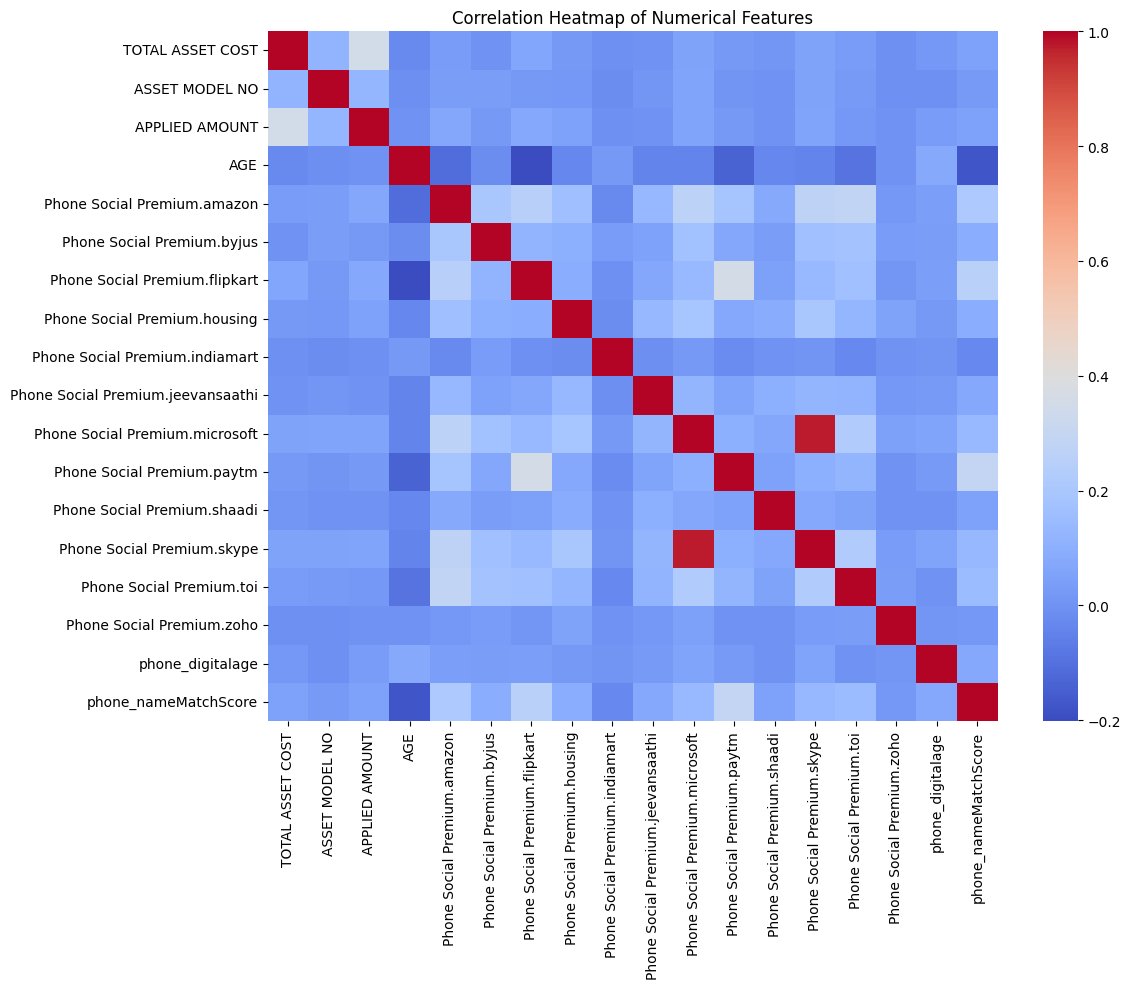

In [ ]:
# Examine correlation between numerical features
numerical_features = train_df_pro.select_dtypes(include=[np.number]).columns
correlation_matrix = train_df_pro[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

1. **Strong Negative Correlation**:

   TOTAL ASSET COST vs. AGE: There's a strong negative correlation between these two variables, suggesting that as the age of the asset increases, its total asset cost tends to decrease. This could be due to depreciation or  
   obsolescence factors.

2. **Moderate Positive Correlation**:

   TOTAL ASSET COST vs. ASSET MODEL NO: A moderate positive correlation indicates that assets with higher model numbers tend to have higher total asset costs. This might be due to technological advancements or increased
   features in newer models.

   ASSET MODEL NO vs. APPLIED AMOUNT: There's a moderate positive correlation here, suggesting that assets with higher model numbers might have higher applied amounts, possibly due to their higher value or cost.

3. **Weak Correlations**: Most of the other correlations are weak or negligible, indicating that these variables have minimal or no direct relationship with each other.

# train test split

In [ ]:
X = train_df_pro.drop(['Application Status'], axis=1)
y = train_df_pro['Application Status']

In [ ]:
X_test_df = test_df_pro.drop(['UID'], axis = 1)
test_uids = test_df_pro['UID']

# Identify columns for label encoding (object data type)
categorical_columns = X_test_df.select_dtypes(include=['object']).columns

# Apply label encoding
le = LabelEncoder()
for col in categorical_columns:
    X_test_df[col] = le.fit_transform(X_test_df[col])

scaler = StandardScaler()
X_test_df_scaled = scaler.fit_transform(X_test_df)

# encoding

In [ ]:
# Identify columns for label encoding (object data type)
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply label encoding
le = LabelEncoder()
for col in categorical_columns:
    X[col] = le.fit_transform(X[col])

In [ ]:
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53, shuffle=True )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 29), (3000, 29), (7000,), (3000,))

In [ ]:
# Normalize the dataset (optional, based on the type of data you have)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define a K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Random Forest Classifier (Bagging technique)
rfc = RandomForestClassifier(random_state=42)
rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=1)
rfc_grid.fit(X_train_scaled, y_train)

best_rfc = rfc_grid.best_estimator_
rfc_preds = best_rfc.predict(X_test_scaled)

print("Best Random Forest Params:", rfc_grid.best_params_)
print("Random Forest Train Accuracy:", best_rfc.score(X_train_scaled, y_train))
print("Random Forest Test Accuracy:", accuracy_score(y_test, rfc_preds))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rfc_preds))
print("Random Forest Classification Report:\n", classification_report(y_test, rfc_preds))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Train Accuracy: 0.9862857142857143
Random Forest Test Accuracy: 0.8806666666666667
Random Forest Confusion Matrix:
 [[1866  127]
 [ 231  776]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1993
           1       0.86      0.77      0.81      1007

    accuracy                           0.88      3000
   macro avg       0.87      0.85      0.86      3000
weighted avg       0.88      0.88      0.88      3000



1. **GridSearchCV**: We are using GridSearchCV to find the best combination of hyperparameters for the Random Forest classifier. This helps to optimize the model's performance.
2. **Hyperparameters**: The hyperparameters being tuned are n_estimators, max_depth, and min_samples_split. These parameters control the number of trees in the forest, the maximum depth of
   each tree, and the minimum number of samples required to split a node, respectively.
3. **Best Parameters**: The best parameters we found through grid search are max_depth=20, min_samples_split=5, and n_estimators=200. This indicates that a forest with 200 trees, a maximum
   depth of 20, and a minimum of 5 samples for splitting nodes likely provides the best performance for this dataset.

**Accuracy**: The training accuracy is **0.8986**, while the testing accuracy is **0.8807** that shows our model is performing well on both the training and testing data, indicating good generalization.

**Classification Report**: The classification report provides more detailed metrics, including **precision, recall, F1-score,** and support for each class. These metrics are used to
                           assess the model's performance in terms of identifying positive and negative instances accurately.

# test_df prediciton

In [ ]:
test_pred = best_rfc.predict(X_test_df_scaled)
test_pred_labels = le.inverse_transform(test_pred)

In [ ]:
submission = pd.DataFrame({
        'UID': test_uids,
        'Prediction': test_pred_labels
    })

submission

,UID,Prediction
0,1844045271814558464,APPROVED
1,1840349097823778816,APPROVED
2,1488102613362294272,APPROVED
3,555529923942874624,APPROVED
4,1010213070486150912,APPROVED
...,...,...
1995,1595862360559879424,APPROVED
1996,879889749720017664,APPROVED
1997,242909456443720192,APPROVED
1998,138725642700761856,APPROVED


In [ ]:
submission.to_csv('predictions.csv', index=False)
print("Predictions on test data have been saved to 'predictions.csv'")

Predictions on test data have been saved to 'predictions.csv'


In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions=clf.fit(X_train_scaled,X_test_scaled, y_train, y_test)
models

100%|██████████| 29/29 [00:19<00:00,  1.52it/s]

[LightGBM] [Info] Number of positive: 2316, number of negative: 4684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330857 -> initscore=-0.704311
[LightGBM] [Info] Start training from score -0.704311


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.82,0.86,0.86,0.83,0.03
QuadraticDiscriminantAnalysis,0.82,0.86,0.86,0.83,0.05
BernoulliNB,0.82,0.86,0.86,0.83,0.03
AdaBoostClassifier,0.88,0.85,0.85,0.88,0.43
XGBClassifier,0.87,0.85,0.85,0.87,0.29
RandomForestClassifier,0.88,0.85,0.85,0.88,0.89
LGBMClassifier,0.87,0.85,0.85,0.87,0.25
BaggingClassifier,0.87,0.85,0.85,0.87,0.30
DecisionTreeClassifier,0.85,0.84,0.84,0.85,0.08


I preferred the **Random Forest classifier** because it is performing well on this dataset, with good accuracy and reasonable precision and recall for both classes. The hyperparameter tuning process helped to optimize the model's performance, and the evaluation metrics provide a comprehensive understanding of its capabilities.